###Subtopic: Price Sensitivity Analysis Across Market Segments

###Dataset: PowerCO Customer Churn

In [ ]:
# Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("client_data.csv")

# Data Cleaning
# Convert date columns to datetime format
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Handle missing values (fill with median for numerical, mode for categorical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Encode categorical variables
df = pd.get_dummies(df, columns=['channel_sales', 'origin_up', 'has_gas'], drop_first=True)


This first cell sets up the analysis environment by importing libraries, loading data, and performing essential preprocessing steps. It handles date conversions, missing values, and categorical encoding to prepare the data for analysis.

### 1. How does peak energy price affect churn?

<ipython-input-11-0c9c3dc17305>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['churn'], y=df['forecast_price_energy_peak'], estimator=lambda x: x.mean(),  ci=None, hue=df['churn'], palette="Set2")


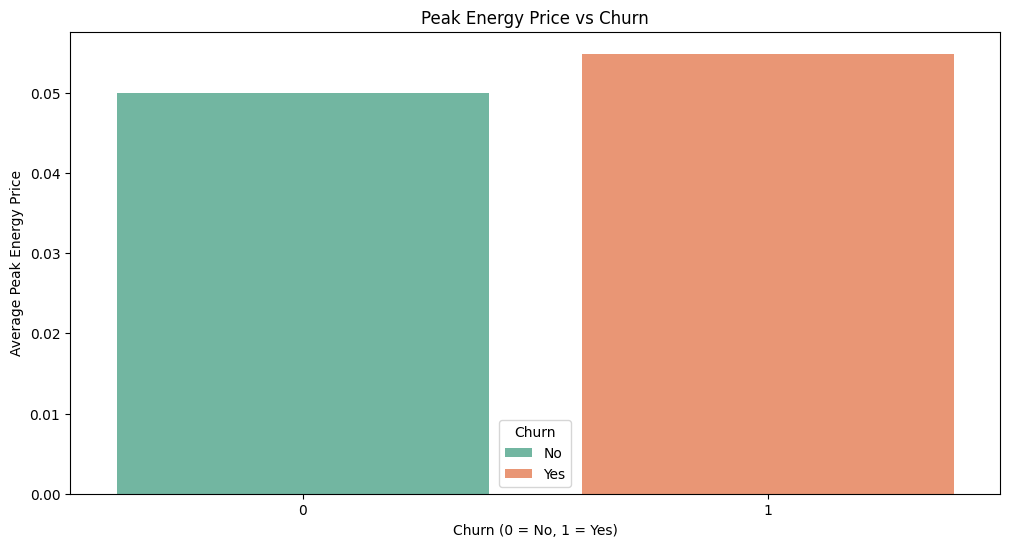

In [ ]:
# Create a bar plot comparing average peak energy prices between churned and non-churned customers
plt.figure(figsize=(12,6))
sns.barplot(x=df['churn'], y=df['forecast_price_energy_peak'], estimator=lambda x: x.mean(),  ci=None, hue=df['churn'], palette="Set2")
plt.title('Peak Energy Price vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Peak Energy Price')
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()



This cell creates a visualization to examine how peak energy pricing differs between customers who churn and those who don't. The bar plot shows the average peak energy price for each group, helping identify if higher prices correlate with higher churn rates.

### 2. How does net margin vary across churned and retained customers?

<ipython-input-4-2312a7203c9c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['churn'], y=df['net_margin'], estimator=lambda x: x.mean(), ci=None, hue=df['churn'], palette="Set2")


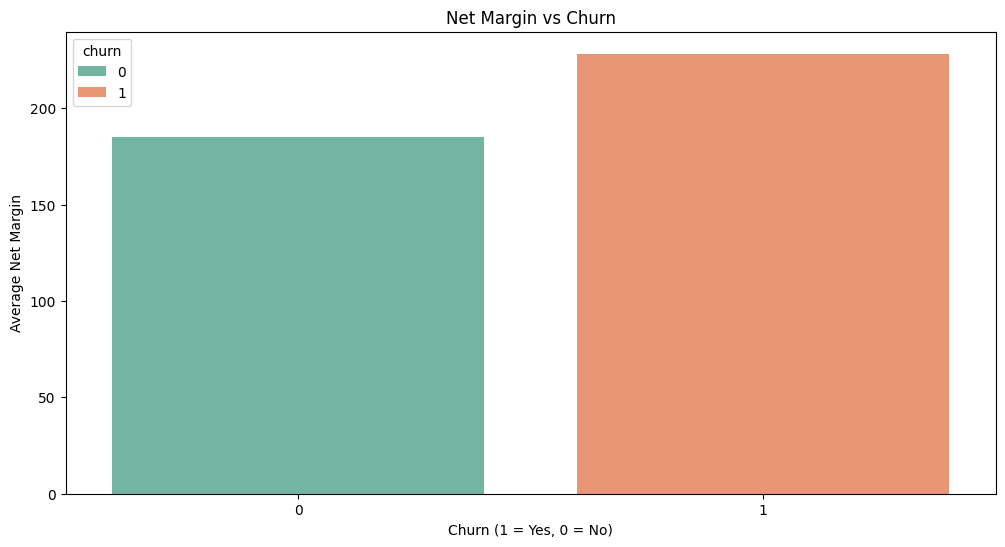

In [ ]:
# Create a bar plot comparing average net margin between churned and non-churned customers
plt.figure(figsize=(12,6))
sns.barplot(x=df['churn'], y=df['net_margin'], estimator=lambda x: x.mean(), ci=None, hue=df['churn'], palette="Set2")
plt.title('Net Margin vs Churn')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Average Net Margin')
plt.show()

This cell analyzes the relationship between customer profitability (net margin) and churn behavior. It visualizes whether more profitable customers (higher net margin) are more or less likely to churn.

### 3. How does the number of years a customer has been with the company affect churn?

<ipython-input-12-b7c8f706bbe8>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates_tenure = df.groupby('tenure_category')['churn'].mean() * 100  # Convert to percentage
<ipython-input-12-b7c8f706bbe8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates_tenure.index, y=churn_rates_tenure.values, palette="Set2")


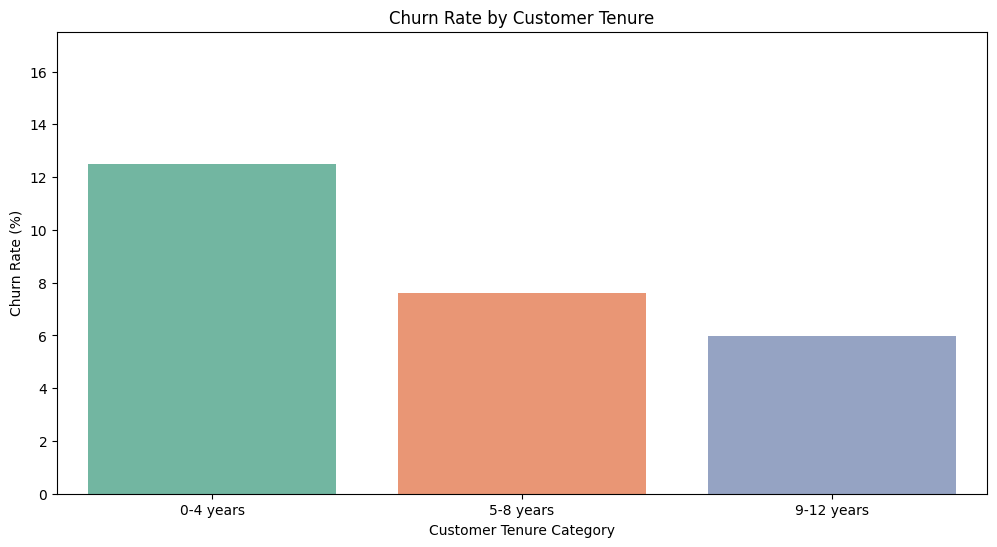

In [ ]:
# Define bin edges and labels for categorizing customers by tenure
bins = [0, 4, 8, 12]
labels = ['0-4 years', '5-8 years', '9-12 years']

# Create a new column for tenure categories
df['tenure_category'] = pd.cut(df['num_years_antig'], bins=bins, labels=labels, include_lowest=True)

# Calculate churn rate for each tenure category
churn_rates_tenure = df.groupby('tenure_category')['churn'].mean() * 100  # Convert to percentage

# Plot Bar chart for churn rate by customer tenure
plt.figure(figsize=(12,6))
sns.barplot(x=churn_rates_tenure.index, y=churn_rates_tenure.values, palette="Set2")
plt.title('Churn Rate by Customer Tenure')
plt.xlabel('Customer Tenure Category')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, churn_rates_tenure.max() + 5)  # Adjust Y-axis limit for clarity
plt.show()

This cell investigates how customer loyalty (measured by tenure) affects churn rates. By categorizing customers into tenure groups and calculating the churn rate for each group, it reveals whether longer relationships correlate with lower churn risk, which helps prioritize retention efforts.

### 4. What is the impact of forecast price on churn?

<ipython-input-9-0feb8993701f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['churn'], y=df['total_forecast_price'], estimator=lambda x: x.mean(), ci=None, hue=df['churn'], palette="Set2")


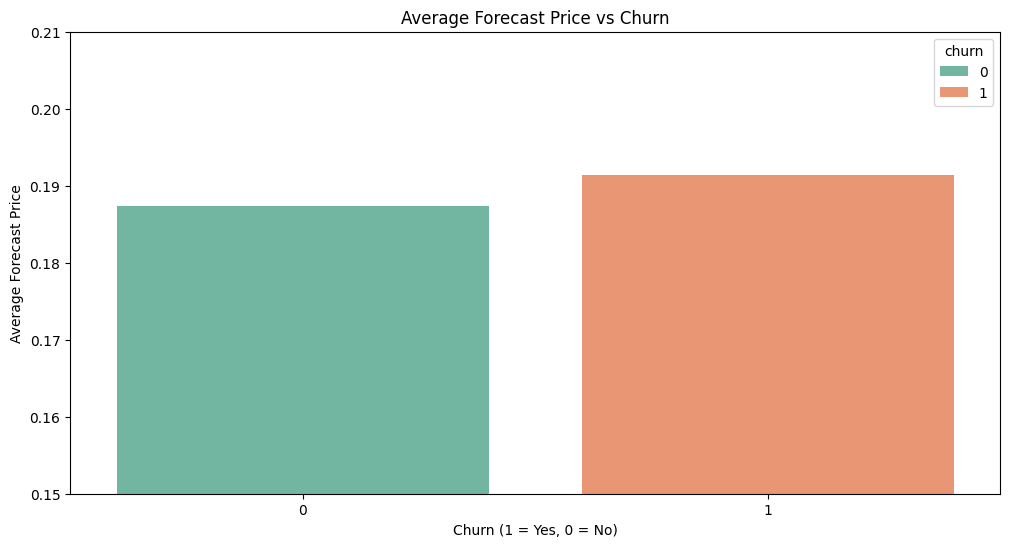

In [ ]:
# Create a new feature combining peak and off-peak forecast prices
df['total_forecast_price'] = df['forecast_price_energy_peak'] + df['forecast_price_energy_off_peak']
# Create a bar plot comparing forecast price between churned and non-churned customers
plt.figure(figsize=(12,6))
sns.barplot(x=df['churn'], y=df['total_forecast_price'], estimator=lambda x: x.mean(), ci=None, hue=df['churn'], palette="Set2")
plt.title('Average Forecast Price vs Churn')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Average Forecast Price')
plt.ylim(0.15,0.21)
plt.show()

This cell creates a composite price metric by combining peak and off-peak forecasted energy prices, then visualizes how this total price differs between customers who churn and those who don't. It helps understand if overall pricing strategy influences customer retention, regardless of specific rate components.

###5. Is there a seasonal trend in churn rates?

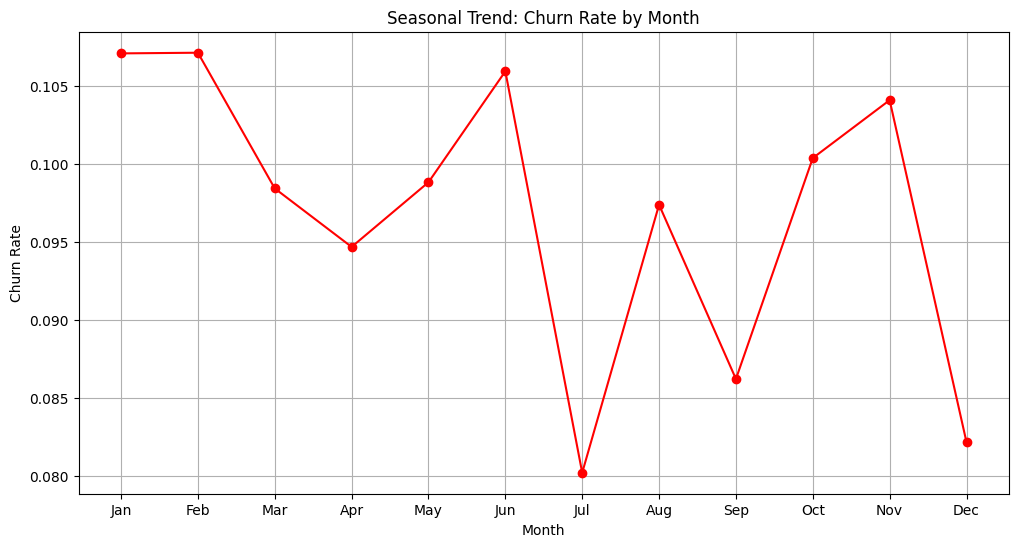

In [ ]:
# Create a new feature seperating different months of the year
df['churn_month'] = df['date_end'].dt.month
monthly_churn = df.groupby('churn_month')['churn'].mean()
# Plot line graph for seasonal trends of churn rate by month
plt.figure(figsize=(12,6))
monthly_churn.plot(marker='o', linestyle='-', color='red')
plt.title('Seasonal Trend: Churn Rate by Month')
plt.xlabel('Month')
plt.ylabel('Churn Rate')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

This cell analyzes the churn rates across different months of the year to see which months tend to have the highest and lowest churn rates.